In [ ]:
!pip install spotipy

     |████████████████████████████████| 138 kB 7.8 MB/s 
     |████████████████████████████████| 63 kB 1.2 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [ ]:
import requests

CLIENT_ID = 'c59b5df6b72643098b2788a2cf145ae3'
CLIENT_SECRET = 'fad1dc2954f549d2b8ce7de7d3299092'

AUTH_URL = 'https://accounts.spotify.com/api/token'

In [ ]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
client_credentials_manager = SpotifyClientCredentials(client_id='c59b5df6b72643098b2788a2cf145ae3', client_secret='fad1dc2954f549d2b8ce7de7d3299092')
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

In [ ]:
artist_name = []
track_name = []
track_popularity = []
artist_id = []
track_id = []
for i in range(0,1000,50):
    track_results = sp.search(q='year:2021', type='track', limit=50,offset=i)
    for i, t in enumerate(track_results['tracks']['items']):
        artist_name.append(t['artists'][0]['name'])
        artist_id.append(t['artists'][0]['id'])
        track_name.append(t['name'])
        track_id.append(t['id'])
        track_popularity.append(t['popularity'])

In [ ]:
import pandas as pd
track_df = pd.DataFrame({'artist_name' : artist_name, 'track_name' : track_name, 'track_id' : track_id, 'track_popularity' : track_popularity, 'artist_id' : artist_id})
print(track_df.shape)
track_df.head()

(1000, 5)


,artist_name,track_name,track_id,track_popularity,artist_id
0,Carolina Gaitán - La Gaita,We Don't Talk About Bruno,52xJxFP6TqMuO4Yt0eOkMz,92,29PgYEggDV3cDP9QYTogwv
1,Dj Biffen,Merry Christmas and Happy New Year 2021 - Radi...,7h7yPyss4MIBVPXVeF83vg,26,7K54lZmkO9dwqe22N27ftb
2,Coldplay,My Universe,3FeVmId7tL5YN8B7R3imoM,90,4gzpq5DPGxSnKTe4SA8HAU
3,Elvis Costello & The Attractions,Pump It Up - 2021 Remaster,3oyc1mIdCBGaU55wX7otqM,64,4qmHkMxr6pTWh5Zo74odpH
4,Olivia Rodrigo,good 4 u,4ZtFanR9U6ndgddUvNcjcG,93,1McMsnEElThX1knmY4oliG


In [ ]:
artist_popularity = []
artist_genres = []
artist_followers = []
for a_id in track_df.artist_id:
  artist = sp.artist(a_id)
  artist_popularity.append(artist['popularity'])
  artist_genres.append(artist['genres'])
  artist_followers.append(artist['followers']['total'])


In [ ]:
track_df = track_df.assign(artist_popularity=artist_popularity, artist_genres=artist_genres, artist_followers=artist_followers)
track_df.head()

,artist_name,track_name,track_id,track_popularity,artist_id,artist_popularity,artist_genres,artist_followers
0,Carolina Gaitán - La Gaita,We Don't Talk About Bruno,52xJxFP6TqMuO4Yt0eOkMz,92,29PgYEggDV3cDP9QYTogwv,78,[],25162
1,Dj Biffen,Merry Christmas and Happy New Year 2021 - Radi...,7h7yPyss4MIBVPXVeF83vg,26,7K54lZmkO9dwqe22N27ftb,25,[],27
2,Coldplay,My Universe,3FeVmId7tL5YN8B7R3imoM,90,4gzpq5DPGxSnKTe4SA8HAU,92,"[permanent wave, pop]",35156162
3,Elvis Costello & The Attractions,Pump It Up - 2021 Remaster,3oyc1mIdCBGaU55wX7otqM,64,4qmHkMxr6pTWh5Zo74odpH,58,"[art rock, folk rock, mellow gold, new wave po...",226107
4,Olivia Rodrigo,good 4 u,4ZtFanR9U6ndgddUvNcjcG,93,1McMsnEElThX1knmY4oliG,91,[pop],15691497


In [ ]:
track_features = []
for t_id in track_df['track_id']:
  af = sp.audio_features(t_id)
  track_features.append(af)

In [ ]:
print(track_features[0][0].keys())[]

dict_keys(['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'type', 'id', 'uri', 'track_href', 'analysis_url', 'duration_ms', 'time_signature'])


In [ ]:
tf_df = pd.DataFrame(columns = ['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'type', 'id', 'uri', 'track_href', 'analysis_url', 'duration_ms', 'time_signature'])
for item in track_features:
  for feat in item:
    tf_df = tf_df.append(feat, ignore_index=True)
tf_df.head()


,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.577,0.450,0,-8.516,0,0.0834,0.35700,0,0.1110,0.830,205.863,audio_features,52xJxFP6TqMuO4Yt0eOkMz,spotify:track:52xJxFP6TqMuO4Yt0eOkMz,https://api.spotify.com/v1/tracks/52xJxFP6TqMu...,https://api.spotify.com/v1/audio-analysis/52xJ...,216120,4
1,0.887,0.633,8,-10.453,1,0.0660,0.06290,0.922,0.0637,0.849,130.023,audio_features,7h7yPyss4MIBVPXVeF83vg,spotify:track:7h7yPyss4MIBVPXVeF83vg,https://api.spotify.com/v1/tracks/7h7yPyss4MIB...,https://api.spotify.com/v1/audio-analysis/7h7y...,176363,4
2,0.588,0.701,9,-6.390,1,0.0402,0.00813,0,0.2000,0.443,104.988,audio_features,3FeVmId7tL5YN8B7R3imoM,spotify:track:3FeVmId7tL5YN8B7R3imoM,https://api.spotify.com/v1/tracks/3FeVmId7tL5Y...,https://api.spotify.com/v1/audio-analysis/3FeV...,228000,4
3,0.645,0.809,11,-6.120,1,0.0385,0.00921,0.00108,0.1060,0.966,138.978,audio_features,3oyc1mIdCBGaU55wX7otqM,spotify:track:3oyc1mIdCBGaU55wX7otqM,https://api.spotify.com/v1/tracks/3oyc1mIdCBGa...,https://api.spotify.com/v1/audio-analysis/3oyc...,196680,4
4,0.563,0.664,9,-5.044,1,0.1540,0.33500,0,0.0849,0.688,166.928,audio_features,4ZtFanR9U6ndgddUvNcjcG,spotify:track:4ZtFanR9U6ndgddUvNcjcG,https://api.spotify.com/v1/tracks/4ZtFanR9U6nd...,https://api.spotify.com/v1/audio-analysis/4ZtF...,178147,4


In [ ]:
tf_df['duration_ms'] = pd.to_numeric(tf_df['duration_ms'])
#cols_to_drop1 = ['track_id','artist_id']
cols_to_drop2 = ['key','mode','type', 'uri','track_href','analysis_url']
#track_df = track_df.drop(columns=cols_to_drop1)
tf_df = tf_df.drop(columns=cols_to_drop2)
print(track_df.info())
print(tf_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   artist_name        1000 non-null   object
 1   track_name         1000 non-null   object
 2   track_id           1000 non-null   object
 3   track_popularity   1000 non-null   int64 
 4   artist_id          1000 non-null   object
 5   artist_popularity  1000 non-null   int64 
 6   artist_genres      1000 non-null   object
 7   artist_followers   1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      112 non-null    float64
 1   energy            112 non-null    float64
 2   loudness          112 non-null    float64
 3   speechiness       112 no

In [ ]:
track_df['artist_name'] = track_df['artist_name'].astype("string")
track_df['track_name'] = track_df['track_name'].astype("string")
track_df['track_id'] = track_df['track_id'].astype("string")
track_df['artist_id'] = track_df['artist_id'].astype("string")
tf_df['instrumentalness'] = pd.to_numeric(tf_df['instrumentalness'])
tf_df['time_signature'] = tf_df['time_signature'].astype("category")
print(track_df.info())
print(tf_df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   artist_name        1000 non-null   string
 1   track_name         1000 non-null   string
 2   track_id           1000 non-null   string
 3   track_popularity   1000 non-null   int64 
 4   artist_id          1000 non-null   string
 5   artist_popularity  1000 non-null   int64 
 6   artist_genres      1000 non-null   object
 7   artist_followers   1000 non-null   int64 
dtypes: int64(3), object(1), string(4)
memory usage: 62.6+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   danceability      112 non-null    float64 
 1   energy            112 non-null    float64 
 2   loudness          112 non-null    float64 
 3   speechin

In [ ]:
track_df.sort_values(by=['track_popularity'], ascending=False)[['track_name', 'artist_name']].head(20)

,track_name,artist_name
18,abcdefu,GAYLE
16,Enemy (with JID) - from the series Arcane Leag...,Imagine Dragons
128,Envolver,Anitta
164,Where Are You Now,Lost Frequencies
20,STAY (with Justin Bieber),The Kid LAROI
12,Woman,Doja Cat
14,THATS WHAT I WANT,Lil Nas X
54,Bad Habits,Ed Sheeran
4,good 4 u,Olivia Rodrigo
72,The Motto,Tiësto


In [ ]:
by_art_fol = pd.DataFrame(track_df.sort_values(by=['artist_followers'], ascending=False)[['artist_followers','artist_popularity', 'artist_name','artist_genres']])
by_art_fol.astype(str).drop_duplicates().head(20)


,artist_followers,artist_popularity,artist_name,artist_genres
722,95439609,96,Ed Sheeran,"['pop', 'uk pop']"
326,62551136,98,Drake,"['canadian hip hop', 'canadian pop', 'hip hop'..."
542,60283059,92,Billie Eilish,"['art pop', 'electropop', 'pop']"
160,59150515,96,Justin Bieber,"['canadian pop', 'pop']"
894,54492849,95,Eminem,"['detroit hip hop', 'hip hop', 'rap']"
426,51678657,97,Taylor Swift,['pop']
544,48081120,96,BTS,"['k-pop', 'k-pop boy group']"
64,46561822,100,Bad Bunny,"['latin', 'reggaeton', 'trap latino']"
112,43677239,97,The Weeknd,"['canadian contemporary r&b', 'canadian pop', ..."
198,39594276,92,Bruno Mars,"['dance pop', 'pop']"


In [ ]:
def to_1D(series):
 return pd.Series([x for _list in series for x in _list])
to_1D(track_df['artist_genres']).value_counts().head(20)

progressive house       214
trance                  191
pop                     158
progressive trance      150
uplifting trance        150
edm                     137
pop dance               131
rap                     105
dance pop                63
hip hop                  61
trap                     51
rock                     47
contemporary country     47
mellow gold              42
art rock                 42
folk rock                41
dutch trance             39
roots rock               39
power pop                38
pub rock                 38
dtype: int64

Text(0.5, 1.0, 'Top genres')

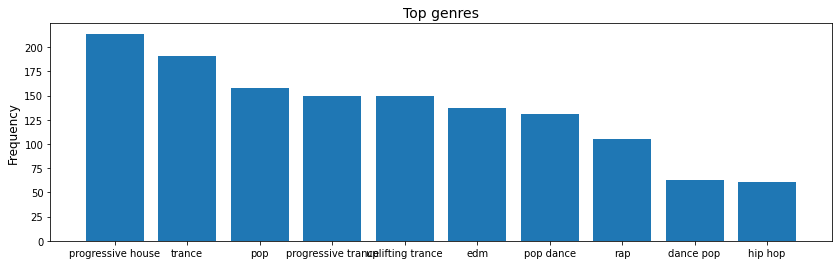

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize = (14,4))
ax.bar(to_1D(track_df['artist_genres']).value_counts().index[:10],
        to_1D(track_df['artist_genres']).value_counts().values[:10])
ax.set_ylabel("Frequency", size = 12)
ax.set_title("Top genres", size = 14)


In [ ]:
top_10_genres = list(to_1D(track_df['artist_genres']).value_counts().index[:20])
top_artists_by_genre = []
for genre in top_10_genres:
  for index, row in by_art_fol.iterrows():
    if genre in row['artist_genres']:
      top_artists_by_genre.append({'artist_name':row['artist_name'], 'artist_genre':genre})
      break
pd.json_normalize(top_artists_by_genre)

,artist_name,artist_genre
0,Armin van Buuren,progressive house
1,Tiësto,trance
2,Ed Sheeran,pop
3,Above & Beyond,progressive trance
4,Above & Beyond,uplifting trance
5,Marshmello,edm
6,Marshmello,pop dance
7,Drake,rap
8,Bruno Mars,dance pop
9,Drake,hip hop


In [ ]:
by_track_pop = pd.DataFrame(track_df.sort_values(by=['track_popularity'], ascending=False)[['track_popularity','track_name', 'artist_name','artist_genres', 'track_id']])
by_track_pop.astype(str).drop_duplicates().head(20)
top_songs_by_genre = []
for genre in top_10_genres:
  for index, row in by_track_pop.iterrows():
    if genre in row['artist_genres']:
      top_songs_by_genre.append({'track_name':row['track_name'], 'track_popularity':row['track_popularity'],'artist_name':row['artist_name'], 'artist_genre':genre})
      break
pd.json_normalize(top_songs_by_genre)

,track_name,track_popularity,artist_name,artist_genre
0,Feel It (Mixed),42,Cosmic Gate,progressive house
1,The Motto,93,Tiësto,trance
2,Where Are You Now,94,Lost Frequencies,pop
3,Feel It (Mixed),42,Cosmic Gate,progressive trance
4,Feel It (Mixed),42,Cosmic Gate,uplifting trance
5,Where Are You Now,94,Lost Frequencies,edm
6,Where Are You Now,94,Lost Frequencies,pop dance
7,One Right Now (with The Weeknd),89,Post Malone,rap
8,Woman,94,Doja Cat,dance pop
9,Knife Talk (with 21 Savage ft. Project Pat),88,Drake,hip hop


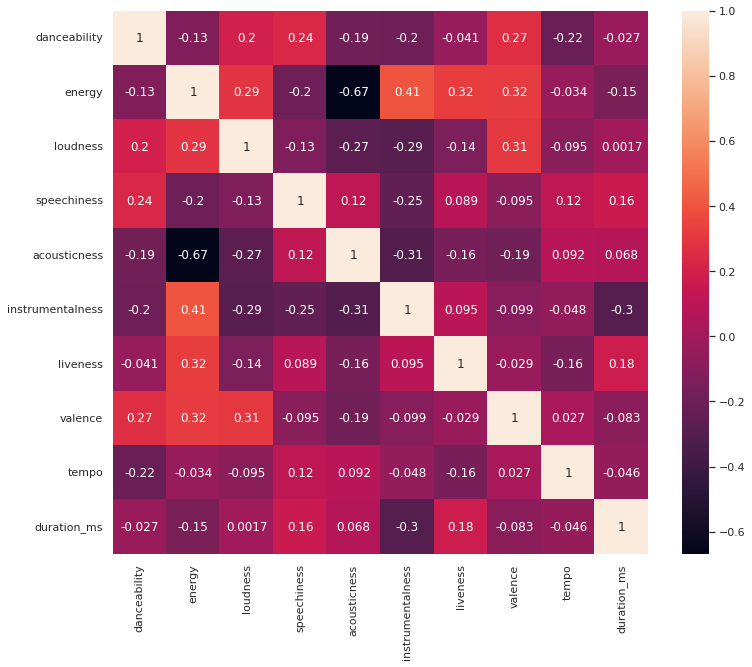

In [ ]:
import seaborn as sn
sn.set(rc = {'figure.figsize':(12,10)})
sn.heatmap(tf_df.corr(), annot=True)
plt.show()

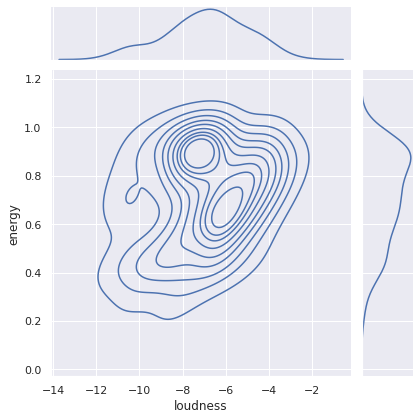

In [ ]:
sn.set(rc = {'figure.figsize':(20,20)})
sn.jointplot(data=tf_df, x="loudness", y="energy", kind="kde")

In [ ]:
# TODO create a dataframe with features of top 100 songs
feat_cols = ['danceability', 'energy', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence']
top_100_feat = pd.DataFrame(columns=feat_cols)
for i, track in by_track_pop[:100].iterrows():
  features = tf_df[tf_df['id'] == track['track_id']]
  top_100_feat = top_100_feat.append(features, ignore_index=True)
top_100_feat = top_100_feat[feat_cols]

In [ ]:
from sklearn import preprocessing
mean_vals = pd.DataFrame(columns=feat_cols)
mean_vals = mean_vals.append(top_100_feat.mean(), ignore_index=True)
mean_vals = mean_vals.append(tf_df[feat_cols].mean(), ignore_index=True)
mean_vals

,danceability,energy,speechiness,acousticness,instrumentalness,liveness,valence
0,0.642717,0.607304,0.118035,0.249576,0.013983,0.157446,0.441041
1,0.599000,0.707509,0.097911,0.180661,0.140762,0.228357,0.491059


In [ ]:
import plotly.graph_objects as go
import plotly.offline as pyo
fig = go.Figure(
    data=[
        go.Scatterpolar(r=mean_vals.iloc[0], theta=feat_cols, fill='toself', name='Top 100'),
        go.Scatterpolar(r=mean_vals.iloc[1], theta=feat_cols, fill='toself', name='All'),
    ],
    layout=go.Layout(
        title=go.layout.Title(text='Feature comparison'),
        polar={'radialaxis': {'visible': True}},
        showlegend=True
    )
)

#pyo.plot(fig)
fig.show()

In [ ]:
rec = sp.recommendations(seed_artists=["3PhoLpVuITZKcymswpck5b"], seed_genres=["pop"], seed_tracks=["1r9xUipOqoNwggBpENDsvJ"], limit=100)
for track in rec['tracks']:
  print(track['artists'][0]['name'], track['name'])


Twenty One Pilots Stressed Out
Elton John Take Me To The Pilot
Bryson Tiller Don't
Muse Won’t Stand Down
Wale My Love (feat. Major Lazer, WizKid, Dua Lipa)
Commodores Easy
NOTD I Wanna Know (feat. Bea Miller)
Shawn Mendes In My Blood
Maroon 5 Sugar
Nevada The Mack
Yusuf / Cat Stevens Wild World
NF JUST LIKE YOU
Cheat Codes Feels Great (feat. Fetty Wap & CVBZ)
Daryl Hall & John Oates She's Gone
Passenger Let Her Go
League of Legends Phoenix
George Michael Freedom! '90 - Remastered
Halsey Could Have Been Me
G-Eazy Good Life (with G-Eazy & Kehlani)
The Beach Boys I Get Around (Mono)
The Weeknd I Feel It Coming
Simon & Garfunkel Bridge Over Troubled Water
The Chainsmokers Closer
Katy Perry Unconditionally
Samuel Kim Hoist the Colours - Epic Version
Nick Jonas Right Now
Rihanna Work
Flume Never Be Like You
Dynoro In My Mind
A R I Z O N A Oceans Away
Elton John Honky Cat
NF CLOUDS
John Mellencamp Hurts So Good
Chris Brown New Flame
Imagine Dragons Follow You
Set It Off Wolf in Sheep's Clothi